In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
#import fio_people data from 2015-2022
df_people = pd.read_csv("/Users/hahaha/Desktop/xc410/bpd-fio-data-master/fio_people.csv")

/var/folders/ty/gxnyjym901j0t6j70lrzqxrw0000gn/T/ipykernel_26571/2023030065.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_people = pd.read_csv("/Users/hahaha/Desktop/xc410/bpd-fio-data-master/fio_people.csv")


In [3]:
#drop na for race, ethnicity column
df_people = df_people.dropna(subset = ['race', 'ethnicity'])

In [4]:
#see the value for race column
df_people['race'].unique()

array(['white', 'black', 'unknown',
       'native hawaiian / other pacific islander', 'asian',
       'native american / alaskan native', 'other',
       'native hawaiian or other pacific islander'], dtype=object)

In [5]:
#see the value for ethnicity column
df_people['ethnicity'].unique()

array(['not of hispanic origin', 'hispanic origin', 'unknown'],
      dtype=object)

In [6]:
#drop unknown and other type in race column; drop unknown type in ethnicity column
df_people = df_people[(df_people['race'] != 'unknown') & (df_people['race'] != "other") ]
df_people = df_people[(df_people['ethnicity'] != "unknown")]

In [7]:
#create new column "create_race" with 'race' and 'ethnicity' data
df_people['race_ethinicity'] = df_people['race'] + '| ' + df_people['ethnicity']

In [8]:
#assign number for each type in 'race_ethinicity' column
l = df_people['race_ethinicity'].unique()
dic = {}
i = 1
for r in l:
    dic[r] = i
    i+=1
key_list = list(dic.keys())
value_list = list(dic.values())
dic

{'white| not of hispanic origin': 1,
 'black| not of hispanic origin': 2,
 'white| hispanic origin': 3,
 'black| hispanic origin': 4,
 'native hawaiian / other pacific islander| not of hispanic origin': 5,
 'asian| not of hispanic origin': 6,
 'native american / alaskan native| hispanic origin': 7,
 'native american / alaskan native| not of hispanic origin': 8,
 'asian| hispanic origin': 9,
 'native hawaiian / other pacific islander| hispanic origin': 10,
 'native hawaiian or other pacific islander| hispanic origin': 11,
 'native hawaiian or other pacific islander| not of hispanic origin': 12}

In [9]:
#represent type with number in 'race_ethinicity' column
df_people.replace(dic, inplace = True)
df_people

,fc_num,gender,race,recnum,build,hair_style,otherclothing,age,ethnicity,skin_tone,license_state,person_frisked_or_searched,license_type,was_frisked,person_id,race_ethinicity
0,F150008288,man,white,100008298.0,medium,NaN,"orange hat, black hoodie, blue jeans",26.0,not of hispanic origin,light,NaN,NaN,NaN,NaN,NaN,1
1,F150006478,man,black,100006319.0,small,NaN,"blk hoodie, blk pants",29.0,not of hispanic origin,medium brown,NaN,NaN,NaN,NaN,NaN,2
2,F150007000,man,black,100006919.0,muscular,NaN,NaN,38.0,not of hispanic origin,dark,NaN,NaN,NaN,NaN,NaN,2
3,F150006807,man,black,100006695.0,medium,NaN,"red sox jersey, blue jeans, white sneakers",44.0,not of hispanic origin,medium,NaN,NaN,NaN,NaN,NaN,2
4,F150007072,man,black,100007225.0,unknown,NaN,"blackhawks hat, blk sweatshirt, gry sweatpants",31.0,not of hispanic origin,medium brown,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97950,FC22005696,man,white,NaN,medium,short,NaN,49.0,hispanic origin,other,ma,NaN,class d,0.0,3.930299e+10,3
97951,FC22005696,woman,white,NaN,NaN,NaN,NaN,50.0,hispanic origin,NaN,ma,NaN,class d,0.0,3.930299e+10,3
97952,FC22005697,man,white,NaN,medium,NaN,NaN,40.0,hispanic origin,NaN,ma,NaN,NaN,NaN,3.930373e+10,3
97953,FC22005697,man,white,NaN,medium,NaN,NaN,40.0,hispanic origin,NaN,ma,NaN,NaN,1.0,3.930373e+10,3


In [10]:
#create label for 'race_ethinicity' pie chart
i = 0
key_val = []
for value in value_list:
    key_val.append(str(value)+ " - " + key_list[i])
    i +=1
print(key_val)

['1 - white| not of hispanic origin', '2 - black| not of hispanic origin', '3 - white| hispanic origin', '4 - black| hispanic origin', '5 - native hawaiian / other pacific islander| not of hispanic origin', '6 - asian| not of hispanic origin', '7 - native american / alaskan native| hispanic origin', '8 - native american / alaskan native| not of hispanic origin', '9 - asian| hispanic origin', '10 - native hawaiian / other pacific islander| hispanic origin', '11 - native hawaiian or other pacific islander| hispanic origin', '12 - native hawaiian or other pacific islander| not of hispanic origin']


Text(0, 0.5, '')

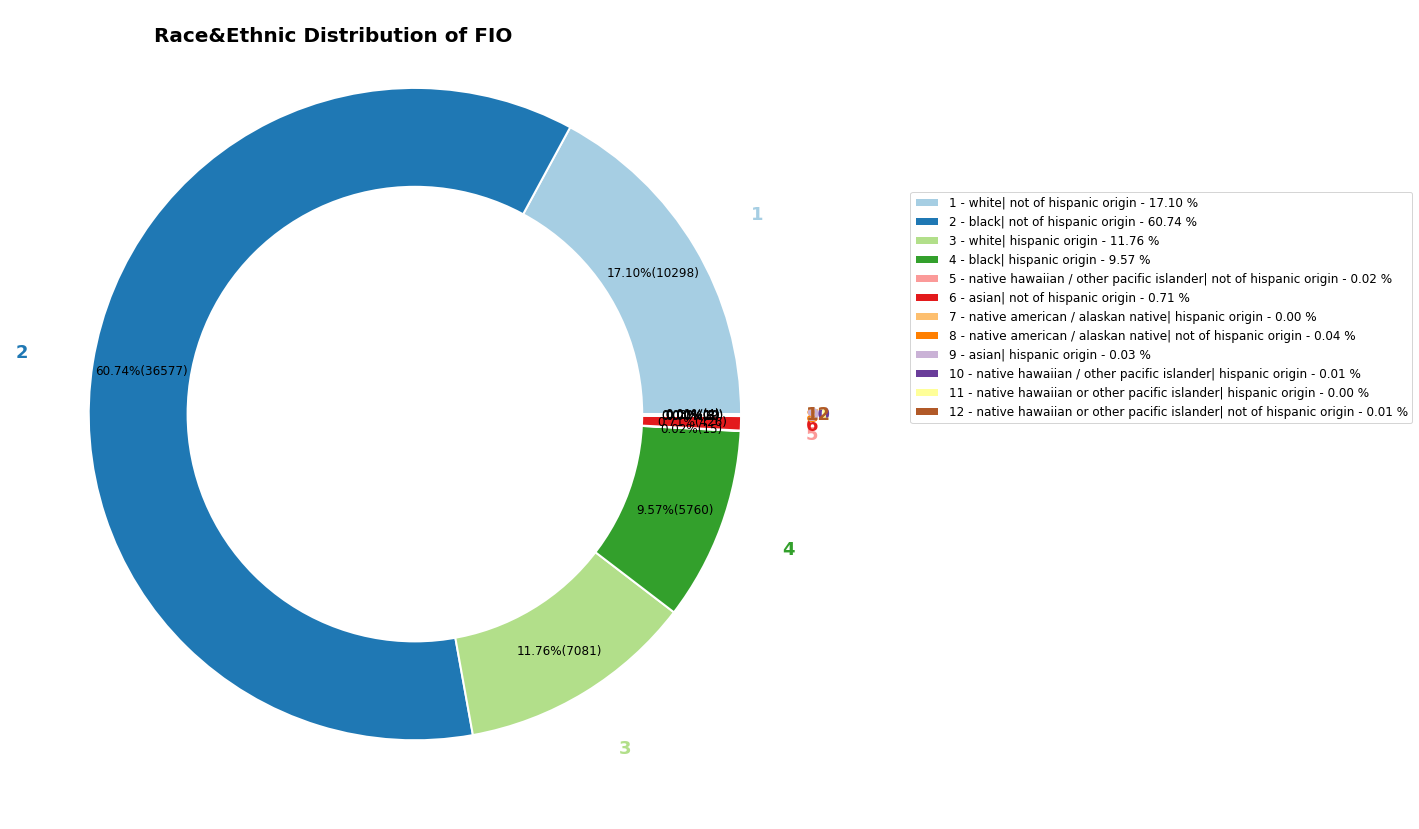

In [11]:
#create pie chart
a = df_people.groupby('race_ethinicity').size()
fig, ax = plt.subplots(figsize=(15, 15))
explode = [0.03]*len(l)
patches, texts, pcts = ax.pie(a, labels = value_list,
       autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*a.sum()), pctdistance=0.85,
       labeldistance=1.2, colors=sns.color_palette("Paired", len(key_list)),
      wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
      textprops={'fontsize': 12})
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600, fontsize=18)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(key_val, 100.*a/a.sum())]
plt.legend(labels,
           bbox_to_anchor=(1.1, 0.78),
          fontsize="12")
ax.set_title("Race&Ethnic Distribution of FIO", fontsize=20, fontweight=900,x=0.4, y=0.95)
plt.ylabel("")

Text(0, 0.5, '')

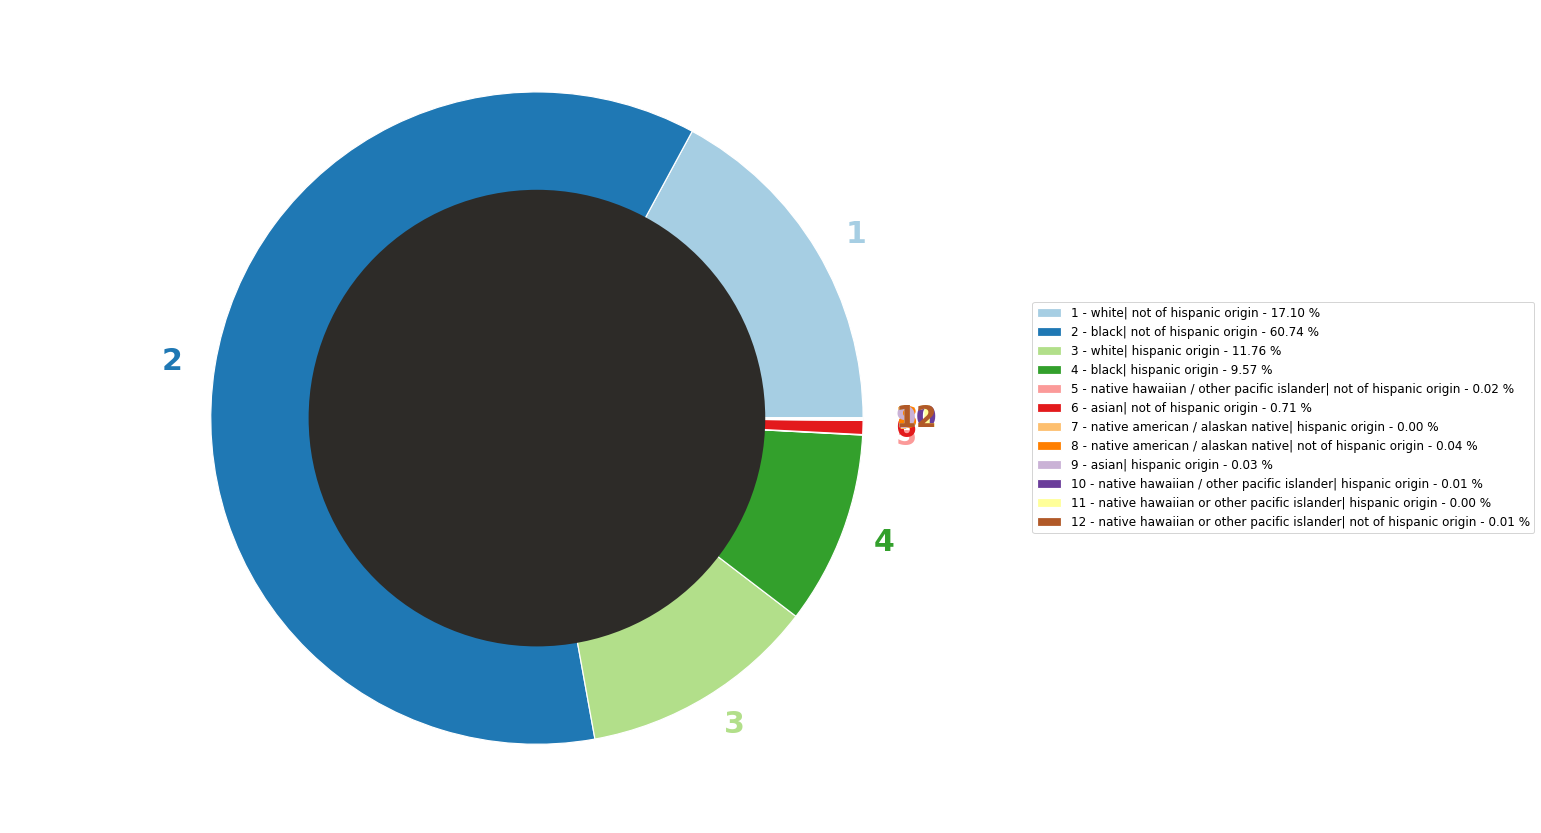

In [39]:
a = df_people.groupby('race_ethinicity').size()
fig, ax = plt.subplots(figsize=(15, 15))
explode = [0.03]*len(l)
patches, texts = ax.pie(a, labels = value_list,
       labeldistance=1.1, colors=sns.color_palette("Paired", len(key_list)),
      wedgeprops={'linewidth': 1.2, 'edgecolor': 'white'})

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600, fontsize=30)

centre_circle = plt.Circle((0, 0), 0.70, fc='#2d2b28')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(key_val, 100.*a/a.sum())]
plt.legend(labels,
           bbox_to_anchor=(1.1, 0.65),
          fontsize="12")
ax.set_title("Race&Ethnic Distribution of FIO", fontsize=50, fontweight=900,x=0.4, y=0.95, color ='white')
plt.ylabel("")